# Simulation datasets

These are designed for ...

## Blood glucose simulation

The glucose

In [1]:
import torchctrnn as ct
from torchctrnn.data.simulations import _simulate_trajectory,GlucoseData
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = GlucoseData(seed=1234)
df = sim.simulate(10)
df.head()

,t,glucose_t,glucose_t_obs,obs,insulin_t,dextrose_t,id
0,0.0,125.848949,125.848949,True,0.0,0.0,0
1,0.1,128.216933,128.216933,False,0.0,0.0,0
2,0.2,130.586911,130.586911,False,0.0,0.0,0
3,0.3,131.379341,131.379341,False,0.0,0.0,0
4,0.4,133.056805,133.056805,False,0.0,0.0,0


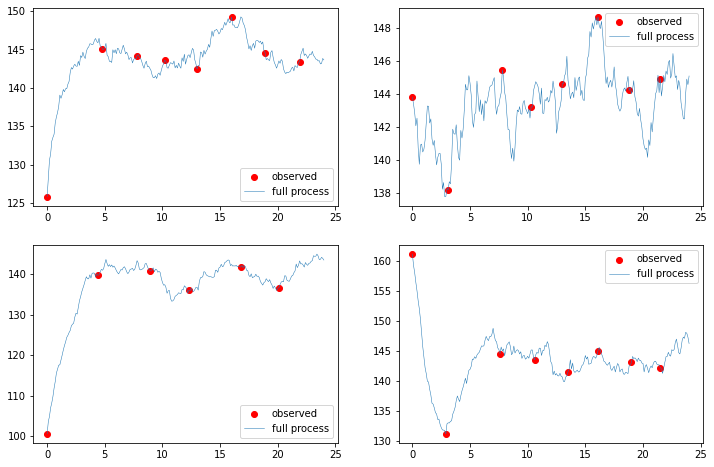

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        col.scatter(df_id.t[df_id.obs],df_id.glucose_t[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.glucose_t,linewidth=0.5,label='full process')
        col.legend()
        _id += 1
plt.show()

### With measurement error

In [4]:
sim = GlucoseData(measurement_error=0.02,seed=1234)
df = sim.simulate(10)
df.head()

,t,glucose_t,glucose_t_obs,obs,insulin_t,dextrose_t,id
0,0.0,125.848949,130.991622,True,0.0,0.0,0
1,0.1,128.216933,129.353942,False,0.0,0.0,0
2,0.2,130.586911,129.361854,False,0.0,0.0,0
3,0.3,131.379341,132.576378,False,0.0,0.0,0
4,0.4,133.056805,132.703853,False,0.0,0.0,0


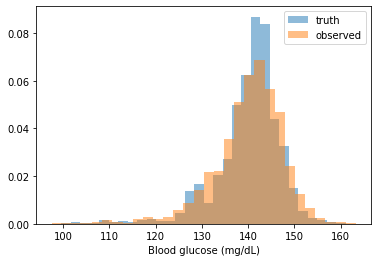

In [12]:
plt.hist(df.glucose_t,bins=30,alpha=0.5,label='truth',density=True)
plt.hist(df.glucose_t_obs,bins=30,alpha=0.5,label='observed',density=True)
plt.xlabel("Blood glucose (mg/dL)")
plt.legend()
plt.show()

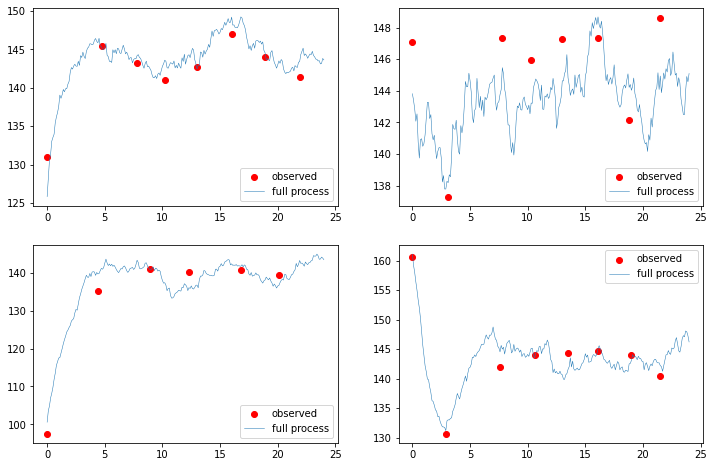

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        col.scatter(df_id.t[df_id.obs],df_id.glucose_t_obs[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.glucose_t,linewidth=0.5,label='full process')
        col.legend()
        _id += 1
plt.show()

### More details

The temporal process

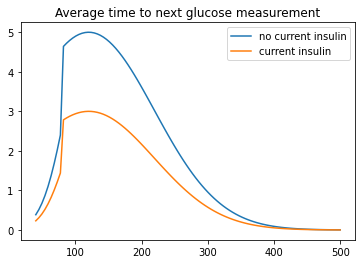

In [7]:
time_next = []
time_next_insulin = []
glucose = np.linspace(40,500,100)
for gl in np.linspace(40,500,100):
    if gl < 80:
        t_ = 5.0 * np.exp(-((gl - 120.0)/50.0) ** 2.0)
        t_insulin = 3.0 * np.exp(-((gl - 120.0)/50.0) ** 2.0)
    else:
        t_ = 5.0 * np.exp(-((gl - 120.0)/140.0) ** 2.0)
        t_insulin = 3.0 * np.exp(-((gl - 120.0)/140.0) ** 2.0)
    time_next.append(t_)
    time_next_insulin.append(t_insulin)
plt.plot(glucose,time_next,label="no current insulin")
plt.plot(glucose,time_next_insulin,label="current insulin")
plt.legend()
plt.title("Average time to next glucose measurement")
plt.show()

The treatment and glucose policy

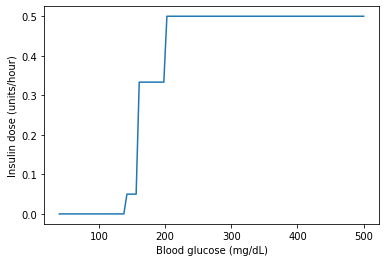

In [8]:
from torchctrnn.data.simulations import _insulin_policy
glucose = np.linspace(40,500,100)
plt.plot(glucose,[_insulin_policy(gl) for gl in glucose])
plt.xlabel("Blood glucose (mg/dL)")
plt.ylabel("Insulin dose (units/hour)")
plt.show()